In [1]:
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

import IPython.display as ipd
import librosa.display

import matplotlib.pyplot as plt 
import seaborn as sns


import scipy

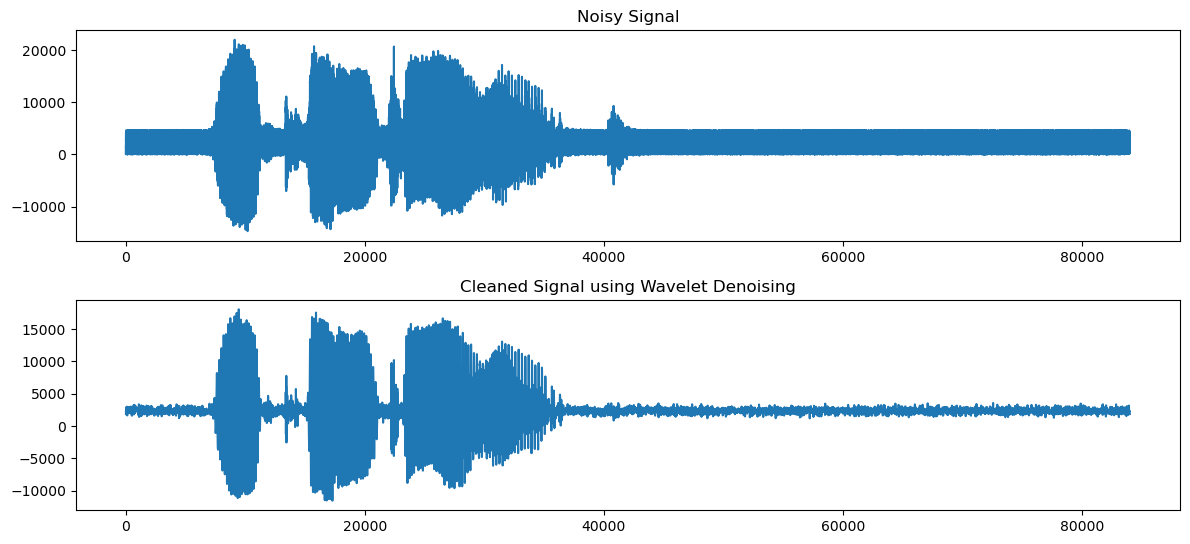

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import wavfile

# Read the audio file (replace 'your_audio_file.wav' with your file)
sample_rate, original_signal = wavfile.read('myaudio.wav')

def noise(data):  
    noise_amp = 0.35 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.uniform(size = data.shape[0])
    return data

noisy_signal = noise(original_signal)

# Convert to mono if stereo
if len(noisy_signal.shape) == 2:
    noisy_signal = noisy_signal.mean(axis=1)

# Perform wavelet denoising
def wavelet_denoise(signal, wavelet='db1', level=2, thresholding='soft'):
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # Estimate noise level (sigma) using the median absolute deviation of the detail coefficients at the first level
    sigma = np.median(np.abs(coeffs[-level])) / 0.6745
    
    # Apply thresholding to detail coefficients
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    coeffs = list(coeffs)
    coeffs[1:] = (pywt.threshold(i, value=uthresh, mode=thresholding) for i in coeffs[1:])
    
    # Reconstruct the signal
    return pywt.waverec(coeffs, wavelet)

cleaned_signal = wavelet_denoise(noisy_signal, wavelet='db8', level=4)

# Plot original, noisy, and cleaned signals
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(noisy_signal)
plt.title('Noisy Signal')
plt.subplot(3, 1, 2)
plt.plot(cleaned_signal)
plt.title('Cleaned Signal using Wavelet Denoising')
plt.tight_layout()
plt.show()

# Save the cleaned signal to a new WAV file (optional)
wavfile.write('cleaned_audio_wavelet.wav', sample_rate, cleaned_signal.astype(np.int16))


In [8]:
ipd.Audio(noisy_signal , rate = sample_rate)

In [9]:
ipd.Audio(cleaned_signal , rate = sample_rate)

### Wavelet denoising worked well compared to weiner.